#### [산점도 그래프]
 - 두 개의 컬럼(변수)의 관계를 시각화해서 표현
 - 연속형(수치형) 데이터에 사용함

In [2]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# [2] 데이터 준비
F_DATA = r'C:\Git\KDT\BigData\EX_PANDAS6\datasets\auto_mpg.csv'

In [4]:
dataDF = pd.read_csv(F_DATA)
dataDF.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [5]:
# 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인
# corr?
corrSR = dataDF.corr(numeric_only=True)['mpg']
# round(corrSR['weight'],2)


SR = ['mpg', 'cylinders','displacement','weight','acceleration','model year','origin']
corrSR

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

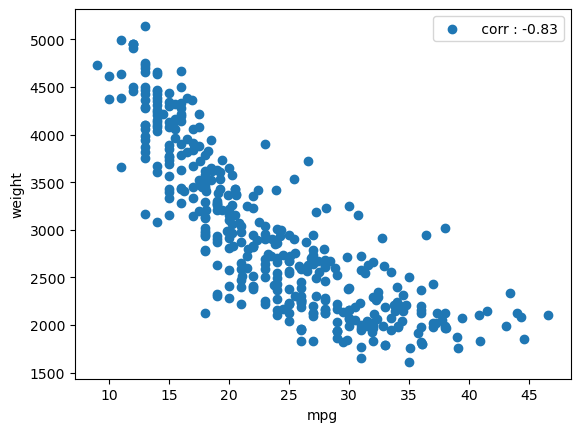

In [7]:
# - [4-2] 시각화
plt.scatter(dataDF.mpg, dataDF.weight, label= f" corr : {round(corrSR['weight'],2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

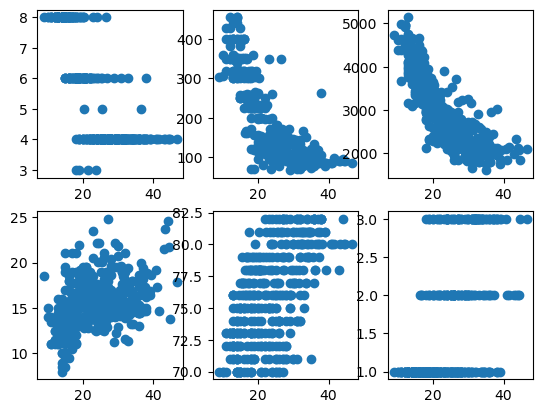

In [8]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
#fig=plt.figure(figsize=(12,10))
# ax1, ax2=fig.subplots(1,2, sharey=True)

fig = plt.figure()
axes = fig.subplots(2,3)

s = 1
for i in range(0,2):
    for j in range(0,3):
        axes[i][j].scatter(dataDF.mpg, dataDF[SR[s]], label= f" corr : {round(corrSR[SR[s]],2)}")
        s += 1


# s = 1
# for i in range(0,2):
#     for j in range(0,3):
#         axes[i][j].scatter(dataDF.mpg, dataDF[SR[s]], xlabel = SR[s])
#         # plt.xlabel('')
#         s += 1



# plt.xlabel('mpg')
# plt.ylabel('cylinders')
# plt.legend()
# plt.layout
plt.show()

#### 강사님 ...풀이

Text(0.5, 0.98, '[mpg & colums]')

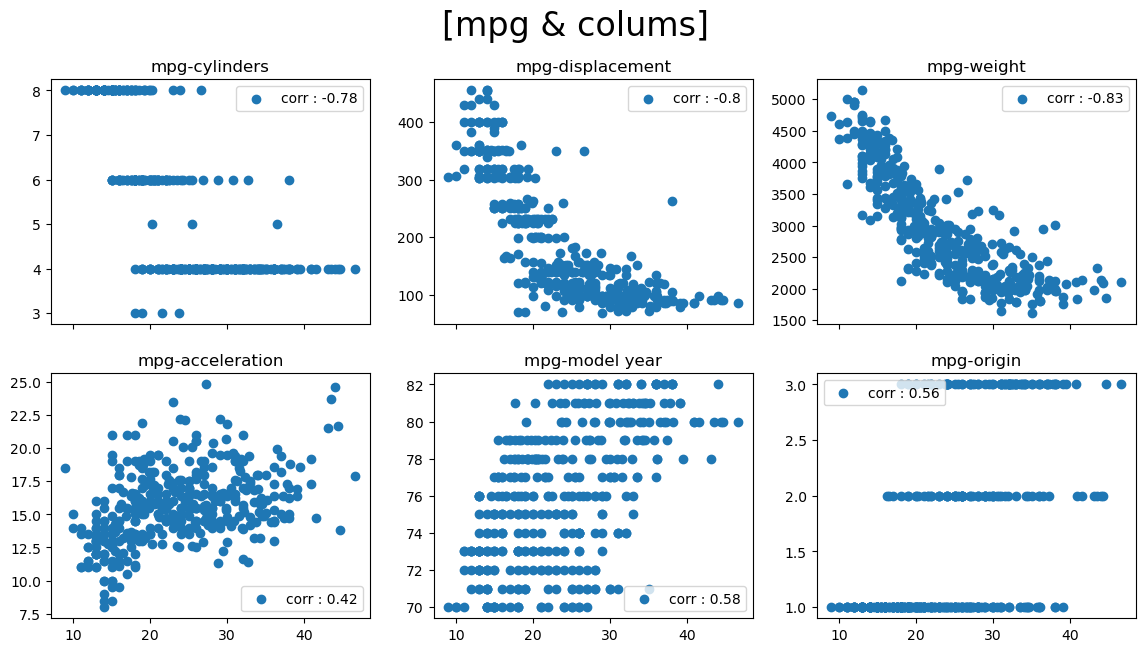

In [9]:
# [4-3] mpg 
# - (1) 그래프 담을 창 생성
fig = plt.figure(figsize = (14,7))

# - (2) 그래프 담을 공간 생성
axs = fig.subplots(2,3, sharex=True)
# axs[0,0].scatter(dataDF['mpg'], dataDF['mpg'])
for row in range(2):
    for col in range(3):
        col_name = corrSR.index[row*3+col+1]
        axs[row, col].scatter(dataDF['mpg'],
                              dataDF[col_name],
                              label = f'corr : {round(corrSR[col_name],2)}')
        axs[row, col].set_title(f'mpg-{col_name}')
        axs[row, col].legend()
fig.suptitle ("[mpg & colums]", fontsize = 24)


#### Day08 추가본 시작점

 - [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관 관계가 높음
    * 연비와 실린더 개수도 반비례 관계


In [10]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

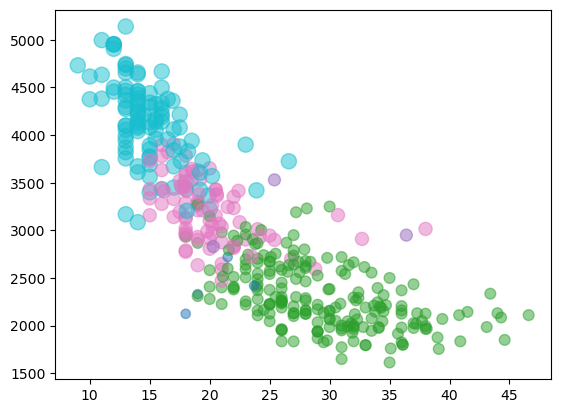

In [12]:
# - mpg와 weight 관계 산점도 (Scatter) 시각화

plt.scatter(dataDF['mpg'], dataDF['weight'],
            s=dataDF['cylinders']*15,
            c=dataDF['cylinders'],
            # cmap = 'plasma',
            cmap = 'tab10',
            alpha=0.5)
plt.xlabel=('mpg')
plt.ylabel=('weight')
# plt.suptitle('mpg-weight scatter')
plt.show()